### Image Processing - scc0251
### Assignment 02 -  Image Enhancement and Filtering

Autor: João Vítor Nasevicius Ramos



In [1]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt

In [2]:
def BilateralFilter(input_img, n, spatialSigma, rangeSigma):
    num_row, num_col = input_img.shape
    mid = n // 2

    output_img = np.zeros((num_col, num_row), dtype= int)
    
    spatialComponent = SpatialGaussianComponent(n, spatialSigma)

    for x in range(0, num_col):
        for y in range(0, num_row):

            inicialIntensityMatrix = np.zeros((n, n), dtype= np.float64)
            for x_filter in range(0, n):
                for y_filter in range(0, n):
                    if x + x_filter - mid >= 0 and x + x_filter - mid < num_col and y + y_filter - mid >= 0 and y + y_filter - mid < num_row:
                        inicialIntensityMatrix[x_filter,y_filter] = input_img[x + x_filter - mid,y + y_filter - mid] 

            rangeComponent = RangeGaussianComponent(inicialIntensityMatrix, n, rangeSigma)


            wi = spatialComponent * rangeComponent
            wf = np.sum(wi)

            finalIntensityMatrix = inicialIntensityMatrix * wi
            finalIntensity = np.sum(finalIntensityMatrix)
            finalIntensity = finalIntensity//wf

            output_img[x,y] = finalIntensity

    return output_img

def LaplacianFilter(input_img, kernel, c):
    num_row, num_col = input_img.shape
    mid = 1

    output_img = np.zeros((num_col, num_row), dtype= np.float64)

    if kernel == 1:
        kernel = np.array([[ 0, -1,  0],
                           [-1,  4, -1],
                           [ 0, -1,  0]])
    elif kernel == 2:
        kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])

    for x in range(0, num_col):
        for y in range(0, num_row):

            intensityMatrix = np.zeros((3, 3), dtype= np.float64)
            for x_filter in range(0, 3):
                for y_filter in range(0, 3):
                    if x + x_filter - mid >= 0 and x + x_filter - mid < num_col and y + y_filter - mid >= 0 and y + y_filter - mid < num_row:
                        intensityMatrix[x_filter,y_filter] = input_img[x + x_filter - mid,y + y_filter - mid]

            intensityMatrix = intensityMatrix * kernel
            output_img[x, y] = np.sum(intensityMatrix)

    output_img = Scaling(output_img)
    output_img = input_img + (output_img * c)
    output_img = Scaling(output_img)

    return output_img

def VignetteFilter(input_img, rowSigma, colSigma):
    num_row, num_col = input_img.shape

    output_img = np.zeros((num_col, num_row), dtype= np.float64)

    centerRow = num_row // 2 - (1 - (num_row % 2))
    centerCol = num_col // 2 - (1 - (num_col % 2))

    wRow = np.zeros((num_row, 1), dtype= np.float64)
    wCol = np.zeros((1, num_col), dtype= np.float64)

    for row in range(0, num_row):
        wRow[row, 0] = row - centerRow 
    for col in range(0, num_col):
        wCol[0, col] = col - centerCol

    wRow = GaussianKernel(wRow, rowSigma)
    wCol = GaussianKernel(wCol, colSigma)

    w = np.matmul(wRow, wCol)

    output_img = input_img * w

    output_img = Scaling(output_img)

    return output_img

def GaussianKernel(matrix, sigma):
    matrix = -(np.power(matrix, 2) / (2 * np.power(sigma, 2)))
    matrix = np.exp(matrix)
    matrix = matrix * (1/(2 * math.pi * np.power(sigma, 2)))

    return matrix

def SpatialGaussianComponent(n, sigma):
    spatialComponent = np.zeros((n, n), dtype= np.float64)

    mid = n // 2
    for x in range(0, n):
        for y in range(0, n):
            spatialComponent[x,y] = math.sqrt(pow(x - mid, 2) + pow(y - mid, 2))

    spatialComponent = GaussianKernel(spatialComponent, sigma)

    return spatialComponent

def RangeGaussianComponent(intensity, n, sigma):
    rangeComponent = np.zeros((n, n), dtype= np.float64)

    mid = n // 2
    for x in range(0, n):
        for y in range(0, n):
               rangeComponent[x,y] = intensity[x,y] - intensity[mid,mid]

    rangeComponent = GaussianKernel(rangeComponent, sigma)

    return rangeComponent

def Scaling(input_img):
    minI = np.amin(input_img)
    maxI = np.amax(input_img)

    output_img = (input_img - minI) * 255 / (maxI - minI) 

    return output_img

def RSE(m, r):
    r = np.float64(r)

    error = np.power(m - r, 2)
    error = np.sum(error)
    error = np.sqrt(error)

    return error

img1 = imageio.imread("Images/airplane.png")
img2 = imageio.imread("Images/arara.png")
img3 = imageio.imread("Images/camera.png")
img4 = imageio.imread("Images/flower.png")
img5 = imageio.imread("Images/moon.png")

### Example - Bilateral Filter


(-0.5, 149.5, 149.5, -0.5)

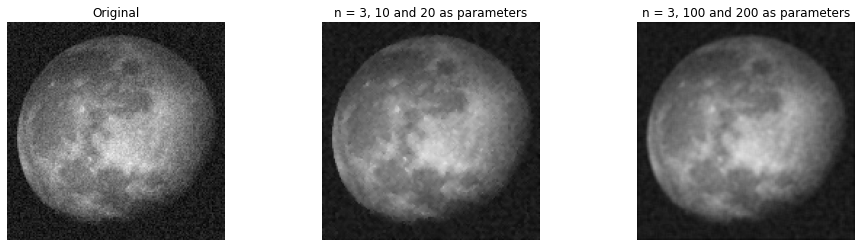

In [17]:
img3_bf3 = BilateralFilter(img3, 3, 150, 100)
img3_bf5 = BilateralFilter(img3, 5, 150, 100)

img5_bfS = BilateralFilter(img5, 3, 10, 20)
img5_bfL = BilateralFilter(img5, 3, 150, 200)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255); plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(img3_bf3, cmap="gray", vmin=0, vmax=255); plt.title('n = 3, 150 and 100 as parameters')
plt.axis('off')
plt.subplot(133)
plt.imshow(img3_bf5, cmap="gray", vmin=0, vmax=255); plt.title('n = 5, 150 and 100 as parameters')
plt.axis('off')

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img5, cmap="gray", vmin=0, vmax=255); plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(img5_bfS, cmap="gray", vmin=0, vmax=255); plt.title('n = 3, 10 and 20 as parameters')
plt.axis('off')
plt.subplot(133)
plt.imshow(img5_bfL, cmap="gray", vmin=0, vmax=255); plt.title('n = 3, 100 and 200 as parameters')
plt.axis('off')


### Example - Laplacian Filter

(-0.5, 249.5, 249.5, -0.5)

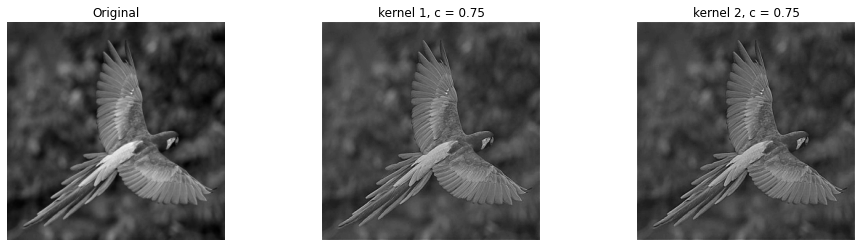

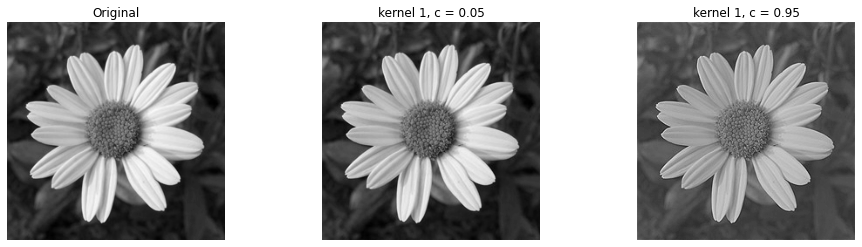

In [22]:
img2LF1 = LaplacianFilter(img2, 1, 0.75)
img2LF2 = LaplacianFilter(img2, 2, 0.75)

img4S = LaplacianFilter(img4, 1, 0.1)
img4B = LaplacianFilter(img4, 1, 0.9)


plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255); plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(img2LF1, cmap="gray", vmin=0, vmax=255); plt.title('kernel 1, c = 0.75')
plt.axis('off')
plt.subplot(133)
plt.imshow(img2LF2, cmap="gray", vmin=0, vmax=255); plt.title('kernel 2, c = 0.75')
plt.axis('off')

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img4, cmap="gray", vmin=0, vmax=255); plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(img4S, cmap="gray", vmin=0, vmax=255); plt.title('kernel 1, c = 0.05')
plt.axis('off')
plt.subplot(133)
plt.imshow(img4B, cmap="gray", vmin=0, vmax=255); plt.title('kernel 1, c = 0.95')
plt.axis('off')

### Example - Vignette Filter

(-0.5, 198.5, 170.5, -0.5)

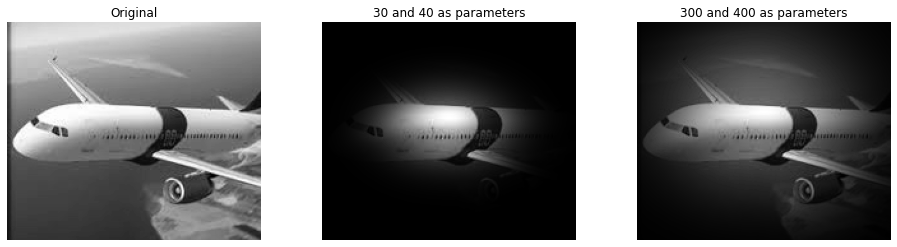

In [28]:
img1S = VignetteFilter(img1, 20, 30)
img1L = VignetteFilter(img1, 40, 50)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255); plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(img1S, cmap="gray", vmin=0, vmax=255); plt.title('20 and 30 as parameters')
plt.axis('off')
plt.subplot(133)
plt.imshow(img1L, cmap="gray", vmin=0, vmax=255); plt.title('40 and 50 as parameters')
plt.axis('off')